In [3]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [4]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv('HPG Historical Data.csv', sep=",")
df=df['Price']

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df = df.str.replace(',', '').astype(float)

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [5]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [6]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [7]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[32847.27383258 32855.09736398 32862.92089537 32870.74442677
 32878.56795817 32886.39148956 32894.21502096 32902.03855236
 32909.86208375 32917.68561515 32925.50914655 32933.33267795
 32941.15620934 32948.97974074 32956.80327214 32964.62680353
 32972.45033493 32980.27386633 32988.09739772 32995.92092912
 33003.74446052 33011.56799191 33019.39152331 33027.21505471
 33035.03858611 33042.8621175  33050.6856489  33058.5091803
 33066.33271169 33074.15624309]


In [8]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 20348.75059446298
Testing MAPE: 188.089726536434
Testing MAE: 20262.286026351834


In [9]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[32847.27383258 32855.09736398 32862.92089537 32870.74442677
 32878.56795817 32886.39148956 32894.21502096 32902.03855236
 32909.86208375 32917.68561515 32925.50914655 32933.33267795
 32941.15620934 32948.97974074 32956.80327214 32964.62680353
 32972.45033493 32980.27386633 32988.09739772 32995.92092912
 33003.74446052 33011.56799191 33019.39152331 33027.21505471
 33035.03858611 33042.8621175  33050.6856489  33058.5091803
 33066.33271169 33074.15624309 33081.97977449 33089.80330588
 33097.62683728 33105.45036868 33113.27390007 33121.09743147
 33128.92096287 33136.74449427 33144.56802566 33152.39155706
 33160.21508846 33168.03861985 33175.86215125 33183.68568265
 33191.50921404 33199.33274544 33207.15627684 33214.97980824
 33222.80333963 33230.62687103 33238.45040243 33246.27393382
 33254.09746522 33261.92099662 33269.74452801 33277.56805941
 33285.39159081 33293.2151222  33301.0386536  33308.862185
 33316.6857164  33324.50924779 33332.3327

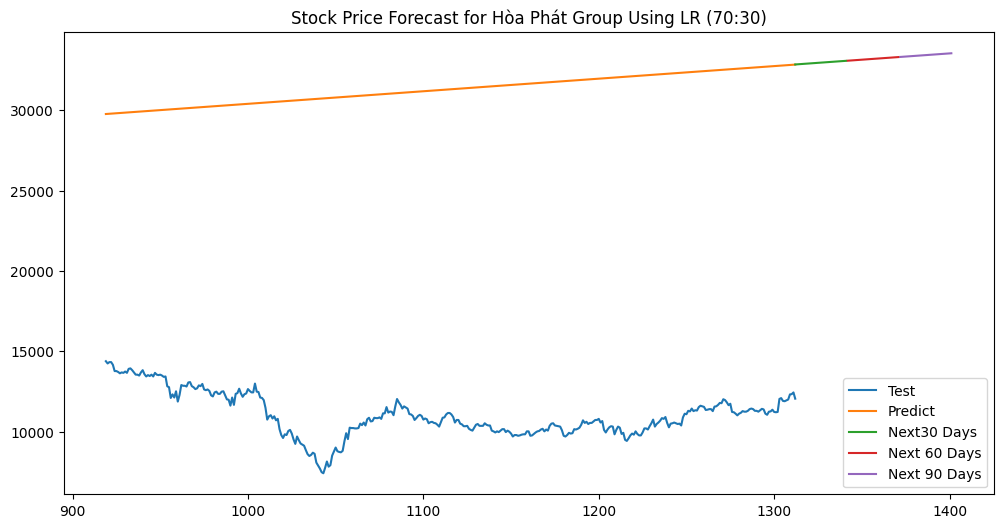

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60])
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(['Test', 'Predict','Next30 Days', "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Hòa Phát Group Using LR (70:30)")
plt.show()

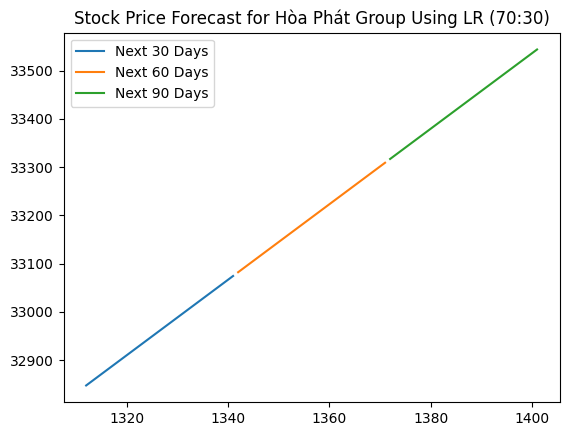

In [11]:
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60]) # Slice y_next_90_days to match x-axis dimensions
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(["Next 30 Days", "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Hòa Phát Group Using LR (70:30)")
plt.show()